# Python for Algorithmic Trading

**Chapter 01 &mdash; Python and Algorithmic Trading**

In [1]:
%%time
import random
from math import exp, sqrt

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

for _ in range(1000000):
    ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * random.gauss(0, 1) * sqrt(T))
    values.append(ST)

CPU times: user 698 ms, sys: 10.8 ms, total: 708 ms
Wall time: 707 ms


In [2]:
%%time
import numpy as np

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.random.standard_normal(1000000) * np.sqrt(T))

CPU times: user 129 ms, sys: 3.48 ms, total: 132 ms
Wall time: 133 ms


In [3]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [4]:
import configparser
c = configparser.ConfigParser()
c.read('../pyalgo_example.cfg')

['../pyalgo_example.cfg']

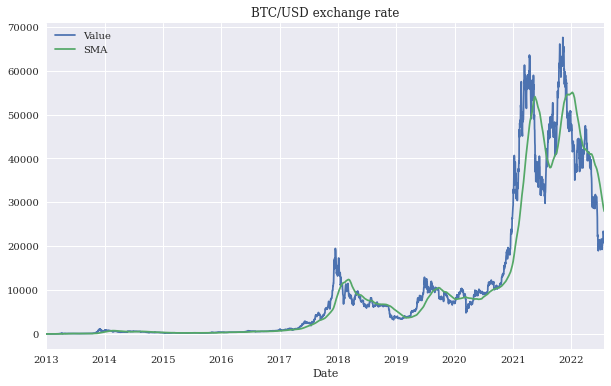

In [5]:
import quandl as q
q.ApiConfig.api_key = c['quandl']['api_key']
d = q.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1':].plot(title='BTC/USD exchange rate', figsize=(10, 6));
# plt.savefig('../../images/ch01/bitcoin_xr.png')

In [6]:
d.tail(10)

,Value,SMA
Date,,
2022-07-17,21197.10,29645.8240
2022-07-18,20774.23,29430.7769
2022-07-19,22538.08,29228.2808
2022-07-20,23403.29,29040.8714
2022-07-21,23227.22,28878.2574
2022-07-22,23154.09,28708.7763
2022-07-23,22687.08,28524.1665
2022-07-24,22461.70,28349.3845
2022-07-25,22582.40,28169.5465
